# Welcome to the CERF model tutorial!

## A brief introduction

The Capacity Expansion Regional Feasibility model (CERF) helps us evaluate the feasibility and structure of future electricity capacity expansion plans by siting power plants in areas that have been deemed the least cost option.  We can use CERF to gain an understanding of topics such as:  1) whether or not future projected electricity expansion plans from models such as GCAM are possible to achieve, 2) where suitability (e.g., cooling water availability) may influence our ability to achieve certain expansions, and/or 3) how power plant infrastructure build outs and value may evolve into the future when considering locational marginal pricing from a grid operations model.

CERF currently operates at a 1 km<sup>2</sup> resolution over the conterminous United States.  Each grid cell is given an initial value of suitable (0) or unsuitable (1) based on a collection of suitability criteria gleaned from the literature.  CERF's default suitability layers include both those that are common to all thermal technologies as well as technology-specific suitability criteria.  Common suitability layers represent categories such as protected lands, critical habitat areas, and much more.  Technology-specific suitability layers are those that satisfy requirements that may not be applicable to all technologies.  An example would be minimum mean annual flow requirements for cooling water availability for individual thermal technologies.

We introduce a metric named **Net Locational Cost (NLC)** that is used compete power plant technologies for each grid cell based on the least expensive option.  NLC is calculated by subtracting the Net Operational Value (NOV) of the proposed power plant from the cost of its interconnection to the grid to represent the potential deployment value.  Both the NOV parameter which incorporates many technology-specific values such as variable operations and maintenance costs, carbon price, heat rate, etc. and the interconnection cost parameter used for both electricity transmission and gas pipelines have variables that are accessible to the user for modification per time step.


## Install `cerf` from GitHub 

```bash
python -m pip install -e git://github.com/IMMM-SFA/cerf.git@main#egg=cerf

```
  

## Load packages

In [1]:
%matplotlib inline

import tempfile

import cerf


In [3]:
cerf.list_available_suitability_files()

['/Users/d3y010/repos/github/cerf/cerf/data/suitability_biomass.sdat',
 '/Users/d3y010/repos/github/cerf/cerf/data/suitability_nuclear.sdat']

## Get CERF's illustrative example data to play with

In [ ]:
cerf.get_package_data('/Users/d3y010/Desktop')


## CERF's configuration tags along with your outputs

The `technology` key is an ID of your choosing.

```yaml
# technology specific information
technology:

    9:
        tech_name: biomass
        lifetime: 60.0
        capacity_factor: 0.6090000000000005
        variable_cost_esc_rate: -0.00398993418629034
        fuel_esc_rate: 0.0
        unit_size: 80
        interconnection_cost_per_km: 552
        variable_om: 11.68495803744351
        heat_rate: 15117.64999999997
        fuel_price: 0.0
        carbon_capture_rate: 0.0
        fuel_co2_content: 0.3035999999999996
        discount_rate: 0.05
        carbon_esc_rate: 0.0
        carbon_tax: 0.0
        buffer_in_km: 5

    11:
        tech_name: nuclear
        lifetime: 60.0
        capacity_factor: 0.8999999999999995
        variable_cost_esc_rate: -0.00104311614063357
        fuel_esc_rate: 0.04639000000000001
        unit_size: 1350
        interconnection_cost_per_km: 1104
        variable_om: 2.098127824402843
        heat_rate: 10246.19999999998
        fuel_price: 0.7128099999999996
        carbon_capture_rate: 0.0
        fuel_co2_content: 0.0
        discount_rate: 0.05
        carbon_esc_rate: 0.0
        carbon_tax: 0.0
        buffer_in_km: 5
```

In [7]:
new_config = cerf_config.copy()


new_config['technology'][9]['interconnection_distance_raster_file'] = 'my_file'

new_config

{'settings': {'run_year': 2010,
  'output_directory': 'None',
  'randomize': True,
  'seed_value': 0},
 'technology': {9: {'tech_name': 'biomass',
   'lifetime': 60.0,
   'capacity_factor': 0.6090000000000005,
   'variable_cost_esc_rate': -0.00398993418629034,
   'fuel_esc_rate': 0.0,
   'unit_size': 80,
   'interconnection_cost_per_km': 552,
   'variable_om': 11.68495803744351,
   'heat_rate': 15117.64999999997,
   'fuel_price': 0.0,
   'carbon_capture_rate': 0.0,
   'fuel_co2_content': 0.3035999999999996,
   'discount_rate': 0.05,
   'carbon_esc_rate': 0.0,
   'carbon_tax': 0.0,
   'buffer_in_km': 5,
   'interconnection_distance_raster_file': 'my_file'},
  11: {'tech_name': 'nuclear',
   'lifetime': 60.0,
   'capacity_factor': 0.8999999999999995,
   'variable_cost_esc_rate': -0.00104311614063357,
   'fuel_esc_rate': 0.04639000000000001,
   'unit_size': 1350,
   'interconnection_cost_per_km': 1104,
   'variable_om': 2.098127824402843,
   'heat_rate': 10246.19999999998,
   'fuel_price'

In [2]:
# read the config YAML file for illustrative purposes
cerf_config = cerf.load_sample_config(yr=2010)
      
cerf_config


{'settings': {'run_year': 2010,
  'output_directory': 'None',
  'randomize': True,
  'seed_value': 0},
 'technology': {9: {'tech_name': 'biomass',
   'lifetime': 60.0,
   'capacity_factor': 0.6090000000000005,
   'variable_cost_esc_rate': -0.00398993418629034,
   'fuel_esc_rate': 0.0,
   'unit_size': 80,
   'interconnection_cost_per_km': 552,
   'variable_om': 11.68495803744351,
   'heat_rate': 15117.64999999997,
   'fuel_price': 0.0,
   'carbon_capture_rate': 0.0,
   'fuel_co2_content': 0.3035999999999996,
   'discount_rate': 0.05,
   'carbon_esc_rate': 0.0,
   'carbon_tax': 0.0,
   'buffer_in_km': 5},
  11: {'tech_name': 'nuclear',
   'lifetime': 60.0,
   'capacity_factor': 0.8999999999999995,
   'variable_cost_esc_rate': -0.00104311614063357,
   'fuel_esc_rate': 0.04639000000000001,
   'unit_size': 1350,
   'interconnection_cost_per_km': 1104,
   'variable_om': 2.098127824402843,
   'heat_rate': 10246.19999999998,
   'fuel_price': 0.7128099999999996,
   'carbon_capture_rate': 0.0,
 

## Get help with CERF functions

In [ ]:
help(cerf.run_parallel)


## Prepare distance to infrastructure data

`cerf` provides two different options for calculating the distance to near suitable transmission infrastructure: 

1. Get the distance to the nearest substation and gas pipeline within the utility zone in which the power plant is being sited.

2. Get the distance to the nearest substation and gas pipeline regardless of whether or not they are within the utility zone in which the power plant is being sited.



In [ ]:
with tempfile.NamedTemporaryFile(suffix='.tif') as temp:
    
    
    


## Run all states in parallel for multiple years and initialize subsequent years with previous data

In [6]:
for index, yr in enumerate([2010, 2050]):

    print(f"PROCESSING YEAR:  {yr}")

    # cerf's built-in default configuration files
    sample_config_file = cerf.config_file(yr)

    # initialize the model with the previous year's siting data if not the start year
    if index == 0:
        sited_df = cerf.run_parallel(sample_config_file)

    else:
        sited_df = cerf.run_parallel(sample_config_file, initialize_site_data=sited_df)


PROCESSING YEAR:  2010
2021-05-06 12:28:21,769 - root - INFO - Starting CERF model
2021-05-06 12:28:21,829 - root - INFO - Staging data...
2021-05-06 12:28:22,438 - root - INFO - Processing locational marginal pricing (LMP)
2021-05-06 12:28:24,579 - root - INFO - Calculating interconnection costs (IC)
2021-05-06 12:28:24,837 - root - INFO - Calculating net operational cost (NOV)
2021-05-06 12:28:25,095 - root - INFO - Calculating net locational cost (NLC)
2021-05-06 12:28:25,209 - root - INFO - Building suitability array
2021-05-06 12:28:26,140 - root - INFO - Staged data in 4.309979 seconds
2021-05-06 12:28:26,141 - root - INFO - Processing state:  alabama
2021-05-06 12:28:26,141 - root - INFO - Extracting suitable grids for alabama
2021-05-06 12:28:26,221 - root - INFO - Creating a NLC state level array for alabama
2021-05-06 12:28:26,243 - root - INFO - Generating grid indices for alabama
2021-05-06 12:28:26,244 - root - INFO - Get grid coordinates for alabama
2021-05-06 12:28:26,24

## Let's take a look at the outputs...

In [7]:
sited_df


,state_name,tech_id,xcoord,ycoord,index,buffer_in_km,sited_year,retirement_year,utility_zone,locational_marginal_pricing,net_operational_value,interconnection_cost,net_locational_cost
0,alabama,11,8.969472e+05,-325565.2005,9084257,5,2010,2070,36,465.572853,1.390931e+10,471771.125000,-1.390884e+10
1,alabama,11,9.029472e+05,-324565.2005,9079570,5,2010,2070,36,465.572853,1.390931e+10,472570.062500,-1.390883e+10
2,alabama,11,9.189472e+05,-321565.2005,9065507,5,2010,2070,36,465.572853,1.390931e+10,474809.812500,-1.390883e+10
3,alabama,11,9.259472e+05,-320565.2005,9060821,5,2010,2070,36,465.572853,1.390931e+10,476324.531250,-1.390883e+10
0,arizona,9,-1.290053e+06,-188565.2005,8439129,5,2010,2070,44,473.208155,1.973037e+08,0.000000,-1.973037e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3,wyoming,9,-8.500528e+05,544434.7995,4999600,5,2050,2110,57,329.848444,1.361196e+08,6171.547363,-1.361134e+08
4,wyoming,9,-1.186053e+06,565434.7995,4900711,5,2050,2110,57,329.848444,1.361196e+08,7069.048828,-1.361125e+08
5,wyoming,9,-1.188053e+06,583434.7995,4816235,5,2050,2110,57,329.848444,1.361196e+08,7069.048828,-1.361125e+08
6,wyoming,11,-7.930528e+05,638434.7995,4558515,5,2050,2110,57,394.008157,1.173185e+10,0.000000,-1.173185e+10


## Ugly plot, but should have this tidy by midweek

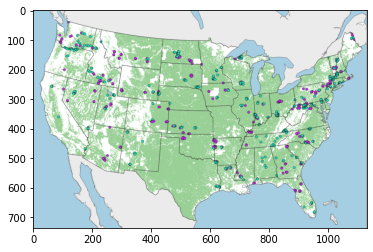

In [8]:
cerf.plot_results()
